In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer, accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [36]:
import pandas as pd
from sklearn.datasets import load_iris

X = pd.DataFrame(iris.data, columns=iris.feature_names) 
y = pd.Series(iris.target, name='target')  

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_encoded = pd.DataFrame(encoder.fit_transform(y.values.reshape(-1, 1)), columns=iris.target_names)

summary_stats = pd.concat([X, y], axis=1).describe(percentiles=[0.25, 0.5, 0.75])

print("One-Hot Encoded Target:")
print(y_encoded.head())
print("\nSummary Statistics:")
print(summary_stats)


One-Hot Encoded Target:
   setosa  versicolor  virginica
0     1.0         0.0        0.0
1     1.0         0.0        0.0
2     1.0         0.0        0.0
3     1.0         0.0        0.0
4     1.0         0.0        0.0

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.10

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (105, 4) (105,)
Testing set shape: (45, 4) (45,)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50]
}

grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9619047619047618


In [44]:
results = pd.DataFrame(grid_search.cv_results_)

sorted_results = results[[
    "rank_test_score", 
    "mean_test_score", 
    "param_min_samples_split", 
    "param_min_samples_leaf", 
    "param_max_features",
    "param_max_leaf_nodes"
]].sort_values("rank_test_score")

# Print the sorted results
sorted_results

,rank_test_score,mean_test_score,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_leaf_nodes
215,1,0.961905,10,4,log2,50
274,1,0.961905,5,2,sqrt,20
273,1,0.961905,2,2,sqrt,20
272,1,0.961905,10,1,sqrt,20
271,1,0.961905,5,1,sqrt,20
...,...,...,...,...,...,...
396,427,0.933333,2,1,log2,None
252,427,0.933333,2,1,sqrt,None
288,427,0.933333,2,1,log2,None
144,427,0.933333,2,1,sqrt,None


In [46]:
best_model = grid_search.best_estimator_
best_params = grid_searc.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=42)

Best Parameters:
max_depth: 3
max_features: sqrt
max_leaf_nodes: None
min_samples_leaf: 1
min_samples_split: 2


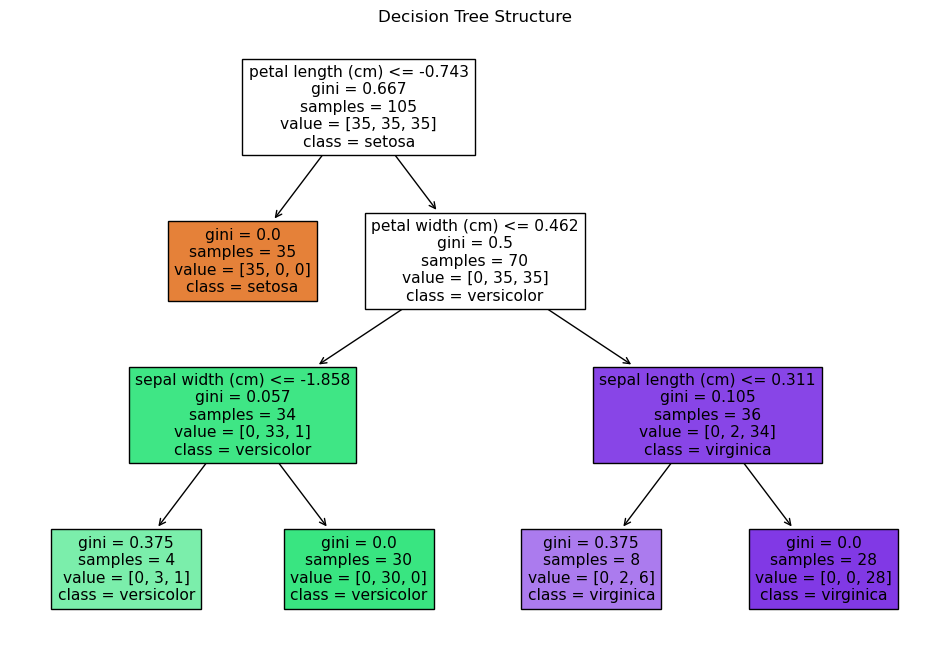

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train your final model
final_model = DecisionTreeClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    max_features=grid_search.best_params_['max_features'],
    max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

final_model.fit(X_train, y_train)

# Convert target_names to a Python list
class_names = list(iris.target_names)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(final_model, feature_names=iris.feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [52]:
from sklearn.metrics import accuracy_score

y_test_pred = final_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8888888888888888


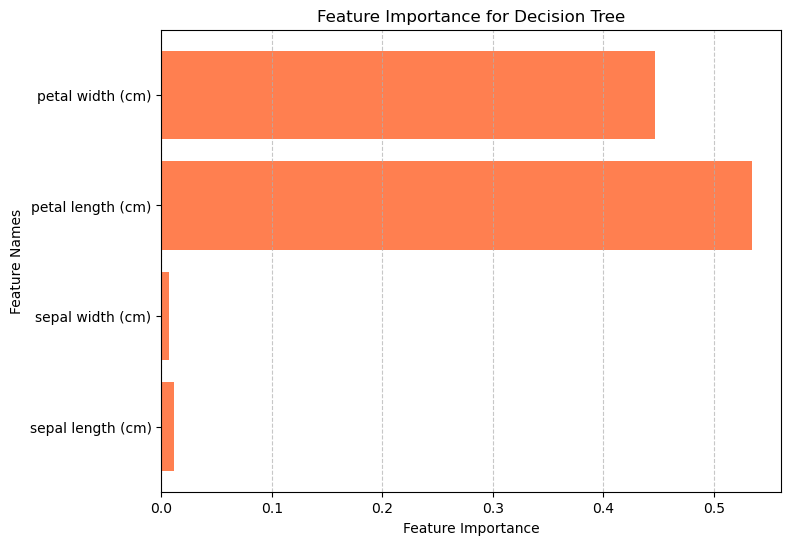

In [54]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = final_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(iris.feature_names, feature_importances, color='coral')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance for Decision Tree')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


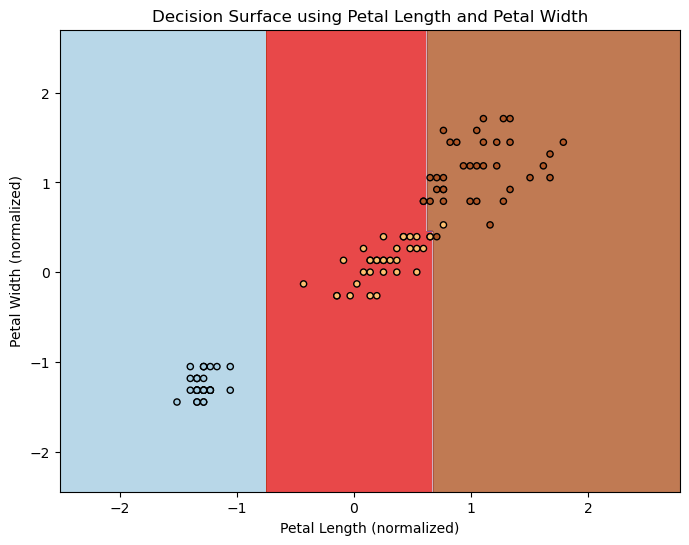

In [56]:
import numpy as np
import matplotlib.pyplot as plt

X_train_2d = X_train[:, [2, 3]] 
X_test_2d = X_test[:, [2, 3]]

model_2d = DecisionTreeClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    max_features=None,
    random_state=42
)
model_2d.fit(X_train_2d, y_train)

x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', s=20, cmap=plt.cm.Paired)
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.title('Decision Surface using Petal Length and Petal Width')
plt.show()

In [133]:
data=pd.read_csv("sinusoidal.csv")
X=data["x"]
y=data["y"]
X = data["x"].values.reshape(-1, 1)  # Reshaping to 2D array (n_samples, 1)
y = data["y"].values  # Ensure y is 1D


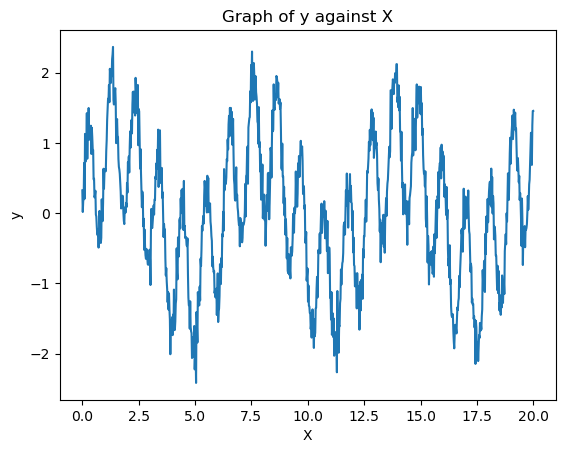

In [135]:
plt.plot(X,y)
plt.title('Graph of y against X')
plt.xlabel('X')
plt.ylabel('y')

plt.show()


In [91]:
summary=data.describe()
summary.T

,count,mean,std,min,25%,50%,75%,max
x,1000.0,10.00000,5.782171,0.000000,5.000000,10.000000,15.000000,20.000000
y,1000.0,0.03962,1.005644,-2.414776,-0.664237,0.036456,0.759265,2.366312


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (700, 1) (700,)
Testing set shape: (300, 1) (300,)


In [139]:
regressor = DecisionTreeRegressor()

# Define the hyperparameter space
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Depth of tree
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples per leaf
    'max_features': [1, None],  # Number of features to consider for best split
    'max_leaf_nodes': [2, 10, 20, 50]  # Max number of leaf nodes
}
# Set up GridSearchCV
clf = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10], 'max_features': [1, None],
                         'max_leaf_nodes': [2, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [141]:
results = pd.DataFrame(clf.cv_results_)

sorted_results = results[[
    "rank_test_score", 
    "mean_test_score", 
    "param_min_samples_split", 
    "param_min_samples_leaf", 
    "param_max_features",
    "param_max_leaf_nodes"
]].sort_values("rank_test_score")

# Print the sorted results
sorted_results

,rank_test_score,mean_test_score,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_leaf_nodes
287,1,-0.155952,10,4,None,50
285,1,-0.155952,2,4,None,50
249,1,-0.155952,2,4,1,50
250,1,-0.155952,5,4,1,50
251,1,-0.155952,10,4,1,50
...,...,...,...,...,...,...
182,217,-0.917792,10,1,None,2
181,217,-0.917792,5,1,None,2
180,217,-0.917792,2,1,None,2
41,217,-0.917792,10,2,None,2


In [143]:
best_model = clf.best_estimator_
best_params = clf.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
DecisionTreeRegressor(max_depth=10, max_features=1, max_leaf_nodes=50,
                      min_samples_leaf=4)

Best Parameters:
max_depth: 10
max_features: 1
max_leaf_nodes: 50
min_samples_leaf: 4
min_samples_split: 2


[Text(0.22054476351351351, 0.9545454545454546, 'x[0] <= 2.613\nsquared_error = 1.006\nsamples = 700\nvalue = 0.043'),
 Text(0.05405405405405406, 0.8636363636363636, 'x[0] <= 1.051\nsquared_error = 0.471\nsamples = 90\nvalue = 0.834'),
 Text(0.02702702702702703, 0.7727272727272727, 'x[0] <= 0.501\nsquared_error = 0.335\nsamples = 38\nvalue = 0.504'),
 Text(0.013513513513513514, 0.6818181818181818, 'squared_error = 0.117\nsamples = 18\nvalue = 0.98'),
 Text(0.04054054054054054, 0.6818181818181818, 'x[0] <= 0.931\nsquared_error = 0.143\nsamples = 20\nvalue = 0.076'),
 Text(0.02702702702702703, 0.5909090909090909, 'squared_error = 0.08\nsamples = 15\nvalue = -0.087'),
 Text(0.05405405405405406, 0.5909090909090909, 'squared_error = 0.012\nsamples = 5\nvalue = 0.567'),
 Text(0.08108108108108109, 0.7727272727272727, 'x[0] <= 1.491\nsquared_error = 0.433\nsamples = 52\nvalue = 1.076'),
 Text(0.06756756756756757, 0.6818181818181818, 'squared_error = 0.125\nsamples = 12\nvalue = 1.723'),
 Text(0

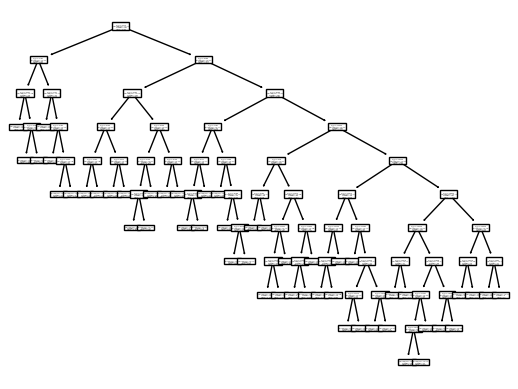

In [145]:
plot_tree(clf.best_estimator_)

In [147]:
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.40039822364721056


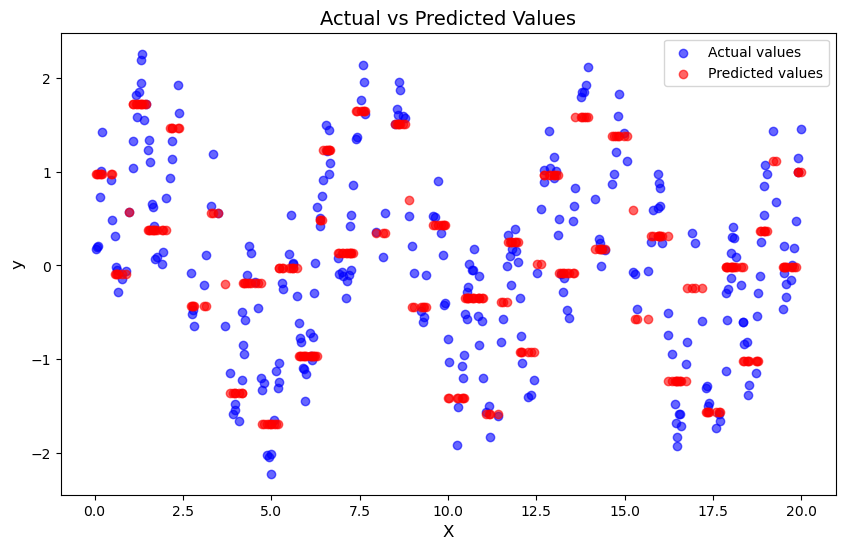

In [149]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot the actual values (y_test) against x
plt.scatter(X_test, y_test, color='blue', label='Actual values', alpha=0.6)

# Plot the predicted values (y_pred) against x
plt.scatter(X_test, y_pred, color='red', label='Predicted values', alpha=0.6)

# Adding titles and labels
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [4]:
df=pd.read_csv("bt-9-quadrants.csv")
X=df[["x1","x2"]]
y=df[["y"]]

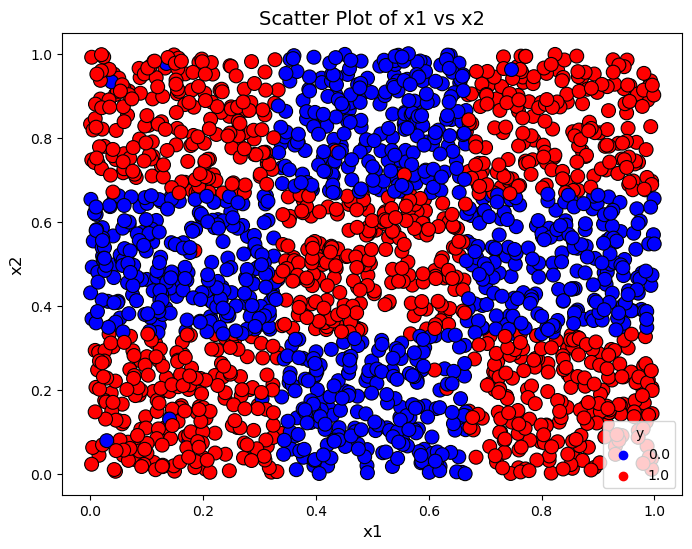

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette={0: 'blue', 1: 'red'}, s=100, edgecolor='black')

# Add labels and title
plt.title('Scatter Plot of x1 vs x2', fontsize=14)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)

# Show the plot
plt.legend(title='y', loc='best')
plt.show()

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
parameters = {
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [1, 2],
    "max_leaf_nodes": [2, 5, 10, 20]
}
decision_tree=DecisionTreeClassifier()

clf=GridSearchCV(decision_tree,parameters, cv=5, scoring="accuracy",verbose=3, n_jobs=-1)

clf.fit(X_train,y_train)


Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=3)

In [12]:
results = pd.DataFrame(clf.cv_results_)

sorted_results = results[[
    "rank_test_score", 
    "mean_test_score", 
    "param_min_samples_split", 
    "param_min_samples_leaf", 
    "param_max_features",
    "param_max_leaf_nodes"
]].sort_values("rank_test_score")

# Print the sorted results
sorted_results

,rank_test_score,mean_test_score,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_leaf_nodes
115,1,0.988571,20,1,2,20
119,2,0.987857,20,2,2,20
123,3,0.987143,20,5,2,20
122,3,0.987143,10,5,2,20
121,3,0.987143,5,5,2,20
...,...,...,...,...,...,...
67,113,0.544286,20,1,2,2
66,113,0.544286,10,1,2,2
65,113,0.544286,5,1,2,2
71,113,0.544286,20,2,2,2


In [14]:
best_model = clf.best_estimator_
best_params = clf.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
DecisionTreeClassifier(max_features=2, max_leaf_nodes=20, min_samples_split=20)

Best Parameters:
max_features: 2
max_leaf_nodes: 20
min_samples_leaf: 1
min_samples_split: 20


[Text(0.6651785714285714, 0.9375, 'x[0] <= 0.639\ngini = 0.498\nsamples = 1400\nvalue = [654, 746]'),
 Text(0.4375, 0.8125, 'x[0] <= -0.58\ngini = 0.498\nsamples = 981\nvalue = [519, 462]'),
 Text(0.17857142857142858, 0.6875, 'x[1] <= -0.579\ngini = 0.472\nsamples = 474\nvalue = [181, 293]'),
 Text(0.10714285714285714, 0.5625, 'x[1] <= -1.118\ngini = 0.038\nsamples = 153\nvalue = [3, 150]'),
 Text(0.07142857142857142, 0.4375, 'x[1] <= -1.127\ngini = 0.07\nsamples = 82\nvalue = [3, 79]'),
 Text(0.03571428571428571, 0.3125, 'gini = 0.048\nsamples = 81\nvalue = [2, 79]'),
 Text(0.10714285714285714, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14285714285714285, 0.4375, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(0.25, 0.5625, 'x[1] <= 0.59\ngini = 0.494\nsamples = 321\nvalue = [178, 143]'),
 Text(0.21428571428571427, 0.4375, 'gini = 0.011\nsamples = 177\nvalue = [176, 1]'),
 Text(0.2857142857142857, 0.4375, 'x[1] <= 1.521\ngini = 0.027\nsamples = 144\nvalue = [2, 14

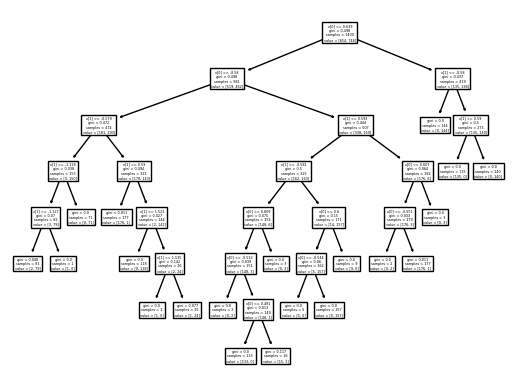

In [16]:
plot_tree(clf.best_estimator_)

In [18]:
r1=clf.best_estimator_
y_pred=r1.predict(X_test)
y_pred.reshape(-1,1).shape
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9883333333333333


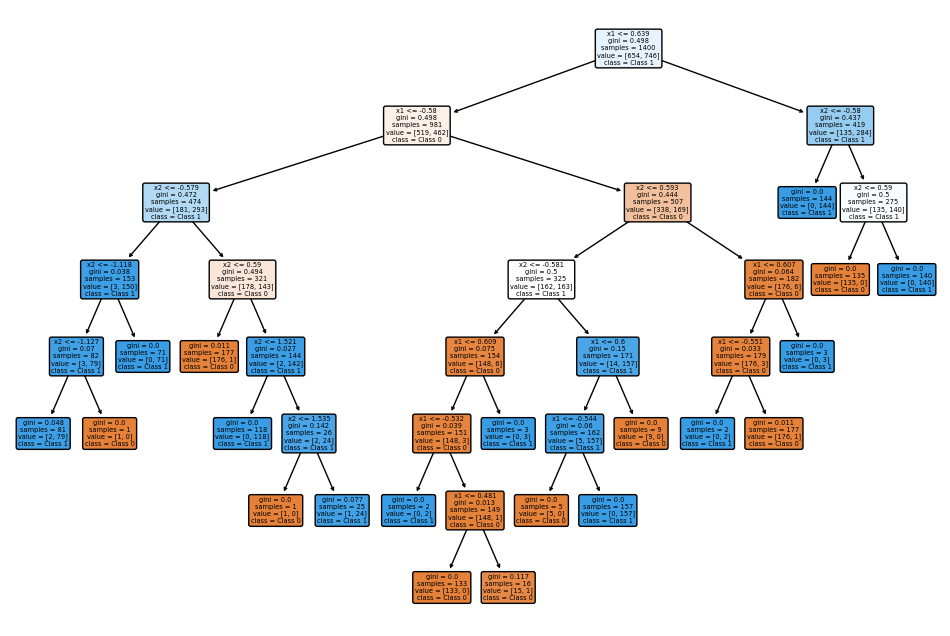

In [20]:
best_tree = clf.best_estimator_

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, feature_names=["x1", "x2"], class_names=["Class 0", "Class 1"], rounded=True)
plt.show()

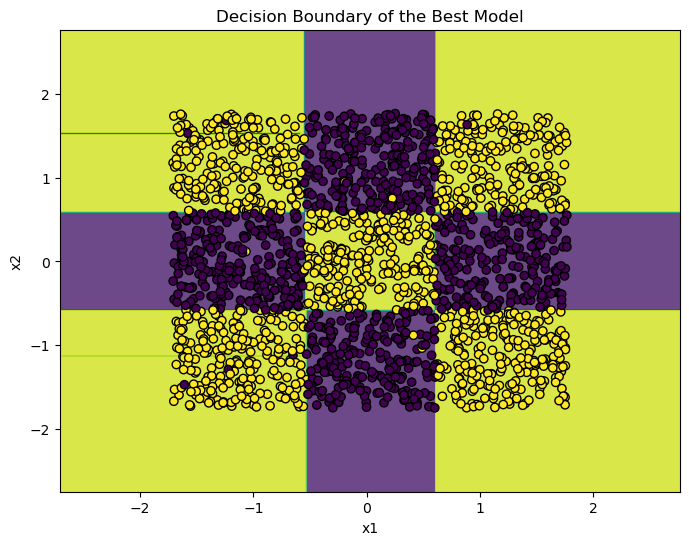

In [24]:
import numpy as np
# Plot decision surface
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="viridis")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["y"], edgecolor="k", cmap="viridis")
plt.title("Decision Boundary of the Best Model")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [111]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/vivekdewangan/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with toleran

In [113]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

X = faces.data  
y = faces.target  

mask = y < 7  
X = X[mask]
y = y[mask]

# Print the shape of the filtered dataset
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)


Features shape (X): (70, 4096)
Target shape (y): (70,)


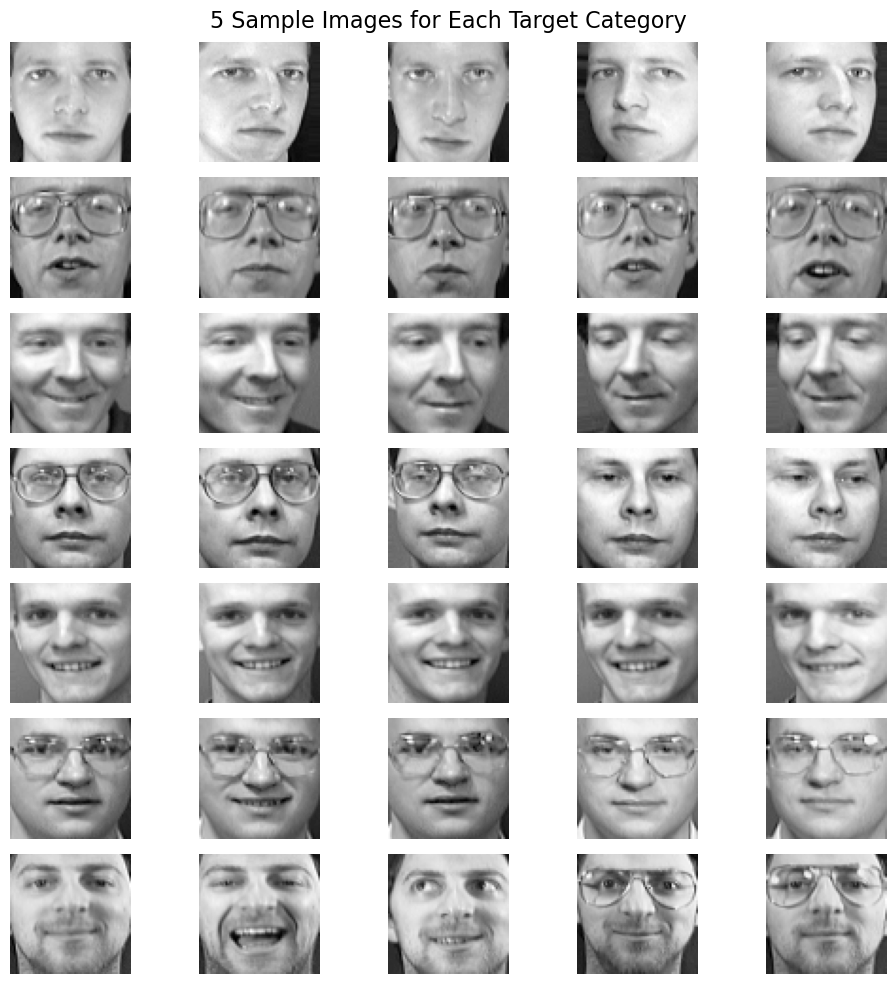

In [115]:
import matplotlib.pyplot as plt

categories = 7
samples_per_category = 5

fig, axes = plt.subplots(categories, samples_per_category, figsize=(10, 10))
fig.suptitle("5 Sample Images for Each Target Category", fontsize=16)

for category in range(categories):
    category_indices = np.where(y == category)[0] 
    for sample_idx in range(samples_per_category):
        image = X[category_indices[sample_idx]].reshape(64, 64) 
        ax = axes[category, sample_idx]
        ax.imshow(image, cmap="gray")
        ax.axis("off")
        if sample_idx == 0:
            ax.set_ylabel(f"Class {category}", fontsize=12)

plt.tight_layout()
plt.show()

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (49, 4096) (49,)
Testing set shape: (21, 4096) (21,)


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [1, 10, 100, 500, 750], 
     'max_depth': [None, 10, 20, 30],      
    'min_samples_split': [1, 5, 10],      
    'min_samples_leaf': [2, 5, 10, 20, 30],  
    'max_features': ['sqrt'],                
    'bootstrap': [True, False]               
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=30, 
    verbose=5  
)




grid_search.fit(X_train, y_train)



print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/Users/vivekdewangan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vivekdewangan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivekdewangan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/vivekdewangan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best Cross-Validation Accuracy: 0.9800000000000001


In [121]:
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)

columns_to_display = ['param_' + p for p in param_grid.keys()] + ['mean_test_score', 'rank_test_score']
results_df = results_df[columns_to_display]

results_df = results_df.sort_values(by='rank_test_score')

print("Top 5 Hyperparameter Combinations:")
print(results_df.head(5))

Top 5 Hyperparameter Combinations:
    param_n_estimators param_max_depth param_min_samples_split  \
308                500            None                       5   
553                500              30                      10   
554                750              30                      10   
403                500              10                      10   
404                750              10                      10   

    param_min_samples_leaf param_max_features param_bootstrap  \
308                      1               sqrt           False   
553                      5               sqrt           False   
554                      5               sqrt           False   
403                      5               sqrt           False   
404                      5               sqrt           False   

     mean_test_score  rank_test_score  
308             0.98                1  
553             0.98                1  
554             0.98                1  
403             0

In [123]:
best_model = grid_search.best_estimator_
print("\nBest Model:")
print(best_model)


Best Model:
RandomForestClassifier(min_samples_split=5, n_estimators=500, random_state=42)


In [125]:
from sklearn.metrics import accuracy_score, classification_report

best_rf_model = grid_search.best_estimator_

y_test_pred = best_rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



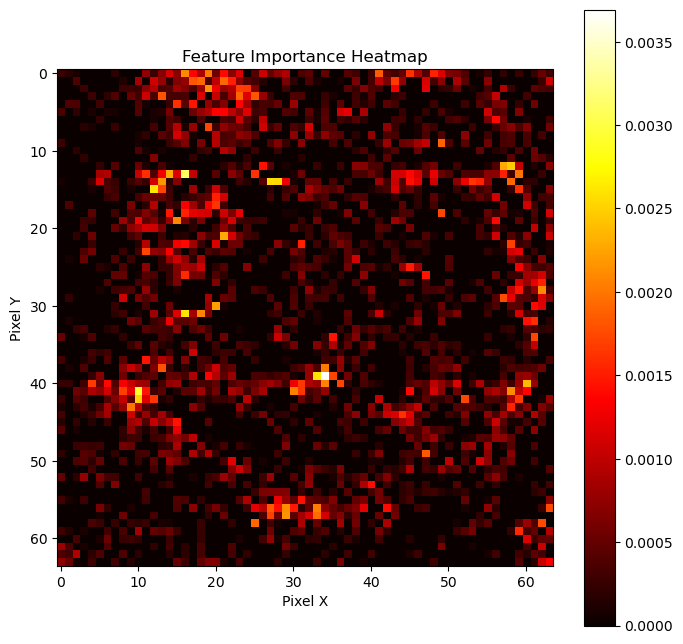

In [127]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_rf_model.feature_importances_

heatmap_importance = feature_importances.reshape(64, 64)

plt.figure(figsize=(8, 8))
plt.imshow(heatmap_importance, cmap="hot", interpolation="nearest")
plt.colorbar()
plt.title("Feature Importance Heatmap")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()
